<a href="https://colab.research.google.com/github/AmtulYasmeen/Projects-Done/blob/Pytorch/cnn_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# cnn layers
# conv layer: local receptive field, react to only those pixels tht lie in lrf
# pooling layer: subsampling of inputs, sampling the inputs to extract higher level abstractions


In [ ]:
# conv layer, allows neurons to focus on lrf, and react to changes in those lrf
# convolution is a mathematical func. sliding window func that is applied to a matrix
# thts the input img = matrix of pixels
# this func extracts features, detect edges corners lines
# it is called kernel or filter
# it is associated with weights, which r determind during training, diff kernels extract diff features
# element-wise sliding window fashion it works

# the result from convolution is a smaller matrix call feature map

# horizontal stride and vertical stride

# conv matrix slide over each channel of the input img seperately, in multi channel imgs


In [ ]:
# conv layers understand the spatial structure and features present in the img fed
# successive layers aggregate inputs into higher level features
# its like putting together a jigsaw puzzels

# features maps r img representations thts passed onto the successive layers
# feature maps are conv layers generated by applying a conv kernel to inp
# every elemtent of a conv layer is a neuron, which reacts to a lrf, local receptive field
# the result of this neuron is generated by applyin a conv kernel, which is the neurons lrf

# kernel size is hyper parameter, small kernels r more efficient
# its better to have kernels which r simulated by few elements in the inut
# which are then aggregated together
# ie stacking 2 3x3 kernel is better than 1 large 9x9 kernel

# stride is the distance btw successive receptive fields
# wont stride off the edeges

# interconnections bwt lrf and neurons of conv layer can be seen as sparse and not dense
# this reduces the no of parameters when we train with cnns

# feature maps
# all neurons in a feature map have the same weights and biases
# ie feature maps that are generated using the same conv kernel will have same weights and biases

# features maps are oftern reffered to as filters coz weights of the kernel highlights our filter specific patterns from the input

# Conv layer
# conv layer is not just one feature map , its made up of stack of feature maps of equal sizes, ths adds depth to conv layer
# which extract diff features from inp
# and cnn is made of many conv layers


# pooling layer
# applies aggregation operation to input, mostly max
# pooling filter is used for this, with no weights and biases
# its basically subsamplling
# reduce memory usage during training, thus no of parameters
# mitigates overfitting
# adds location invariance, recognize features independent of location
# acts on each channel independently
# therfore output area < input area and ouput depth = input depth


In [ ]:
# cnn architecture
# img ---conv layer-batchnormalization layer-relu layer--- pooling layer

In [ ]:
# batch normalization: shifting and scaling the output of conv layer around zero
# which improves the proformance of cnn

In [ ]:
# ouput of every layer in cnn is an image
# results generated by each conv layer gets smaller and deeper

In [ ]:
# final result of cnn is fed into feed forward nn, fully connected nn
# cnn---fc-relu-fc-relu---softmax layer
# output probabilities are given by softmax layer, which helps in prediction


In [ ]:
# conv layer for feature extraction
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
img = Image.open('datasets/images/street.jpg'.convert('RGB'))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms as tf

In [ ]:
transforms = tf.Compose([tf.Resize(400),
                        tf.ToTensor()])

In [ ]:
img_tensor = transorms(img)

In [ ]:
img_tensor.shape

In [ ]:
sharpen_kernel = [[[[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]]]]

horizontal_line_kernel = [[[[1,0,-1],
                    [0,0,0],
                    [-1,0,-1]]]]

vertical_line_kernel = [[[[0,1,0],
                    [1,-4,1],
                    [0,1,0]]]]

edge_detection_kernel = [[[[-1,-1,-1],
                    [-1,0,-1],
                    [-1,-1,-1]]]]
# 4 d matrix, 4d corresponds to no of output channels when kernel is applied
# no of input channels and the kernel height and width

# this kernel is applied to inner most dim 

In [ ]:
# converting the kernel to torch tensor
conv_filter = torch.Tensor(sharpen_kernel)

In [ ]:
conv_filter.shape

In [ ]:
# this kernel outputs a single channel feature map ( first dim in filter is 1)
# 2nd dim in filter is 3 for an rgb img
# 3rd dim is 1 for height of kernel
# 4th dim is 3 for we=idth of kernel

In [ ]:
# conv layer in pytorch work in batches
#  add additional dimension to our img using unsqueeze operation

In [ ]:
img_tensor = img.tensor.unsqueeze(0)
# it will add an additional batch dim of 1 at axis 0
img_tensor.shape
# (1,3,400,599)

In [ ]:
# applying sharpen kernel by calling f.conv2d
F.conv2d is a 2d conv layer which allows us to specify the hardcoded weights of a kernel we wnat to apply 
conv_tensor = F.conv2d(img_tensor, conv_filter, padding=0)

# padding = 0, outp img < input img



In [ ]:
conv_tensor.shape

In [ ]:
removing batch dim frm img to get 3d img
conv_img = conv_tensor[0,:,:,:]
conv_img.shape
(channels, wodth, height)

In [ ]:
# squeeze out the single dim 
conv_img = conv_img.numpy().squeeze()
conv_img.shape

In [ ]:
# view the img
plt.figure(figsize = (20,20))
plt.imshow(conv_img)

In [ ]:
# maxpooling
pool = mm.MaxPool2d(2,2)
pool_tensor = pool(conv_tensor)
pool_tensor.shape
# output size is halved
# depth is not effected by pooling layer


In [ ]:
# to view the img
pool_img = pool_tensor[0,:,:,:]
pool_img.shape

In [ ]:
pool_img = pool_img.numpy().squeeze()
pool_img.shape

In [ ]:
plt.figure(fogsize=(20,10))
plt.imshow(pool_img)
# subsampling the img makes it blurry that helps pooling layer to extract feature 
# in location invariant manner

#code : building cnn using different layer for image classification

#hyperparameters involved

In [ ]:
# hyperparameters
#1. zero padding and stride size
# narrow vs wide convolution
# passing the img to conv layer can give smaller or larger feature map than original img
# narrow convolution : output feature map < img coz of no padding
# wide convolution : output feature map > img coz of zero padding, paded with zeros
# horizontal and vertical stride
# default stride is 1

#2. batch normalization 
# for mitigating vanishing and exploding gradients during training
# backpropagation fails at these conditions
# coping with vg n eg
# proper initialization of weights
# choice of activation func, non staturating in nature
# regularization using batch normalization, shift n scale inputs to center aroung 0
# gradient clipping , set min n max value of grad 
# BN is aplied just before appling activation func
# scaling (multiplying a constant) n shifting (adding a constant) inputs

# 3. choice of activation func
single neuron =  affine transformation + activation func
              =  linear relationships + non-linear realtionships
              = wx + b -------> ReLU or logit or tanh or step func

3. feature map calculation

O = (W - K + 2P / S) + 1
O = output dim
W = input dim
K = size of kernel(mostly square kernel, height = width)
P = padding 
S = stride size

#code for cnn for img classification

In [ ]:
# setting up cnn
# hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

In [ ]:
mnist_train = pd.read_csv('mnist-in-csv/mnist_train.csv')
mnist_test = pd.read_csv('mnist-in-csv/mnist_test.csv')

In [ ]:
mnist_train.head()

In [ ]:
mnist_train = mnist_train.dropna()
mnist_test = mnist_test.dropna()

In [ ]:
random_spl = mnist.sample(8)
random_spl.shape

In [ ]:
image_features = random_sel.drop('label', axis =1)

image_batch = (torch.Tensor(image_features.values / 255.)).reshape((-1, 28, 28))

image_batch.shape

In [ ]:
# make a grid using torchvision
# make_grid convert our imgs into multi channel imgs
grid = torchvision.utils.make_grid(image_batch.unsqueeze(1), nrow=8)

grid.shape

In [ ]:
plt.figure (figsize = (12, 12))
# changing channel info to last as per matplot
plt.imshow(grid.numpy().transpose((1, 2, 0)))

plt.axis('off')

In [ ]:
# seperate img n labels for train n test
mnist_train_features = mnist_train.drop('label', axis =1)
mnist_train_target = mnist_train['label']

mnist_test_features = mnist_test.drop('label', axis =1)
mnist_test_target = mnist_test['label']

In [ ]:
# convert to tensor
X_train_tensor = torch.tensor(mnist_train_features.values, dtype=torch.float)
x_test_tensor  = torch.tensor(mnist_test_features.values, dtype=torch.float) 

Y_train_tensor = torch.tensor(mnist_train_target.values, dtype=torch.long)
y_test_tensor  = torch.tensor(mnist_test_target.values, dtype=torch.long)

In [ ]:
print(X_train_tensor.shape)
print(Y_train_tensor.shape)
print(x_test_tensor.shape)
print(y_test_tensor.shape)

In [ ]:
# reshpe img data into 4d tensors
batch size, channel, width, height
X_train_tensor = X_train_tensor.reshape(-1, 1, 28, 28)

x_test_tensor = x_test_tensor.reshape(-1, 1, 28, 28)

#setting up cnn

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
in_size = 1 # no of channels
# no of conv layers = depth of output = no of feature maps generated
hid1_size = 16 #Re-run for 32
hid2_size = 32 #Re-run for 64
# final linear layer output
out_size = 10
# kernel_size
k_conv_size = 5

In [ ]:
# custom cnn

class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size),
            nn.BatchNorm2d(hid1_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size),
            nn.BatchNorm2d(hid2_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        self.fc = nn.Linear(512, out_size)
        
 
    def forward(self, x):
      # setting up forward func for the above neural network
      # takes the input imgs and applies it to the conv pooling and linear layers
        
        out = self.layer1(x)
        print(out.shape)
        
        out = self.layer2(out)
        print(out.shape)
        
        # reshape the output before feeding it to linear layers as it takes 1d data
        # flattening
        out = out.reshape(out.size(0), -1)
        print(out.shape)
        
        out = self.fc(out)
        print(out.shape)
        
        ## F.log_softmax(out, dim=-1)
        
        return out


In [ ]:
model = ConvNet()

In [ ]:
# copying oer the model parameters to the cuda 0  device to be able to use gpu

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

In [ ]:
# copying using this 
model.to(device)

In [ ]:
# in addition to model parameters we also need to copyover tensors in training and test imgs and labels
X_train_tensor = X_train_tensor.to(device)
x_test_tensor  = x_test_tensor.to(device) 

Y_train_tensor = Y_train_tensor.to(device)
y_test_tensor  = y_test_tensor.to(device)


In [ ]:
#Re-run for each different value

learning_rate = 0.001 
#0.01 

criterion = nn.CrossEntropyLoss() 
#nn.NLLLoss() 

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
#optimizer =torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) 
                    

In [ ]:
# training
num_epochs = 10
loss_values = list()

for epoch in range(1, num_epochs):
        
        outputs = model(X_train_tensor)
        loss = criterion(outputs,Y_train_tensor)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        print('Epoch - %d, loss - %0.5f '%(epoch, loss.item()))
        loss_values.append(loss.item())


In [ ]:
x = (range(0, 9))

plt.figure(figsize = (8, 8))
plt.plot(x, loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
model.eval()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
with torch.no_grad():
    
    correct = 0
    total = 0
    
    outputs = model(x_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    
    y_test = y_test_tensor.cpu().numpy()
    predicted = predicted.cpu()
    
    print("Accuracy: ", accuracy_score(predicted, y_test))
    print("Precision: ", precision_score(predicted, y_test, average='weighted'))
    print("Recall: ", recall_score(predicted, y_test, average='weighted'))

In [ ]:
print("sample target data = ", mnist_test_target.values[1005])

In [ ]:
sample_img = mnist_test_features.values[1005]
sample_img = sample_img.reshape(1, 28, 28)

sample_img = sample_img[0, :, :]

plt.figure(figsize =(6, 6))
plt.imshow(sample_img)

In [ ]:
sample = np.array(mnist_test_features.values[1005]) 

sample_tensor = torch.from_numpy(sample).float()
sample_tensor = sample_tensor.reshape(-1, 1, 28, 28)
sample_tensor = sample_tensor.to(device)

In [ ]:
y_pred = model(sample_tensor)
y_pred

In [ ]:
_, predicted = torch.max(y_pred.data, -1)

print (" The predicted label is : ", predicted.item())

In [ ]:
# hyperparameter tuning
# change no of hidden layers, learning rate, loss, apply diff out func, 
# optimizer, 

#cifar dataset : optimization image classification iwth hyperparameter tuning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [ ]:
mean = [0.49140126, 0.4821608,  0.44652855]
std = [0.24703369, 0.24348529, 0.26158836]

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='datasets/cifar10/train',
                                        train=True,
                                        download=True,
                                        transform=train_transform)


Extracting datasets/cifar10/train/cifar-10-python.tar.gz to datasets/cifar10/train


In [ ]:
testset = torchvision.datasets.CIFAR10(root='datasets/cifar10/train',
                                       train=False,
                                       download=True,
                                       transform=test_transform)

Files already downloaded and verified


In [ ]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=8,
                                          shuffle=True,
                                          num_workers=2)

In [ ]:
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=8,
                                         shuffle=False,
                                         num_workers=2)

In [ ]:
class_names = trainset.classes

print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
img, label = iter(trainloader).next()

In [ ]:
img.shape

In [ ]:
label

In [ ]:
in_size = 3 # rgb img therfore 3

hid1_size = 16
hid2_size = 32
# hid3_size = 64

out1_size = 400
out2_size = 10

# out1_size = 2000
# out2_size = 10

k_conv_size = 5

# kernel_size has to be such tht the output feature map dim has to be an interger
# carfefully choose hte kernel size so that they fit in with the size of the input img 
# and the size of the kernel of the pooling layer we are using
# k_conv_size = 6 or 4 gives error

# k_conv_size = 9 
# its recommended to have smaller kernel size to have fewer parameters


In [ ]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size),
            nn.BatchNorm2d(hid1_size),
            # nn.ReLU(),
            # nn.Sigmoid(),
            # nn.Tanh(),
            nn.ELU(),
            # nn.MaxPool2d(kernel_size=2))
            # nn.AvgPool2d(kernel_size=2))
            nn.LPPool2d(1, kernel_size=2))
            # 2d power avg pooling,
            #  p= infinity = max pooling, p = 1 gives avg pooling
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size),
            nn.BatchNorm2d(hid2_size),
            # nn.ReLU(),
            # nn.Sigmoid(),
            # nn.Tanh(),
            nn.ELU(),
            # nn.MaxPool2d(kernel_size=2))
            # nn.AvgPool2d(kernel_size=2))
            nn.LPPool2d(1, kernel_size=2))
        
        
        self.layer3 = nn.Sequential(
            nn.Linear(hid2_size * k_conv_size * k_conv_size, out1_size),
            # nn.ReLU(),
            # nn.Sigmoid(),
            # nn.Tanh(),
            nn.ELU(),
            nn.Dropout(0.5),
            nn.Linear(out1_size, out2_size))
        
        
    def forward(self, x):
        
        out = self.layer1(x)
        out = self.layer2(out)
        
        out = out.reshape(out.size(0), -1)
        
        out = self.layer3(out)
        
        return F.log_softmax(out, dim=-1)

In [ ]:
model = ConvNet()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)
model.to(device)

cuda:0


ConvNet(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=800, out_features=400, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=400, out_features=10, bias=True)
  )
)

In [ ]:
learning_rate = 0.001

criterion = nn.NLLLoss()

optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate)

In [ ]:
total_step = len(trainloader)
num_epochs = 10
loss_values = list()

In [ ]:
for epoch in range(num_epochs):
    
    for i, (images, labels) in enumerate(trainloader):
        
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        if (i+1) % 2000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
            loss_values.append(loss.item())

            
print('Finished Training')    

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/10], Step [2000/6250], Loss: 1.6925
Epoch [1/10], Step [4000/6250], Loss: 1.3547
Epoch [1/10], Step [6000/6250], Loss: 0.8871
Epoch [2/10], Step [2000/6250], Loss: 1.6863
Epoch [2/10], Step [4000/6250], Loss: 1.4181
Epoch [2/10], Step [6000/6250], Loss: 0.9856
Epoch [3/10], Step [2000/6250], Loss: 1.7801
Epoch [3/10], Step [4000/6250], Loss: 1.3382
Epoch [3/10], Step [6000/6250], Loss: 0.7670
Epoch [4/10], Step [2000/6250], Loss: 1.3310
Epoch [4/10], Step [4000/6250], Loss: 1.3381
Epoch [4/10], Step [6000/6250], Loss: 1.5473
Epoch [5/10], Step [2000/6250], Loss: 1.1999
Epoch [5/10], Step [4000/6250], Loss: 0.7098
Epoch [5/10], Step [6000/6250], Loss: 1.0632
Epoch [6/10], Step [2000/6250], Loss: 0.9159
Epoch [6/10], Step [4000/6250], Loss: 1.7209
Epoch [6/10], Step [6000/6250], Loss: 0.8817
Epoch [7/10], Step [2000/6250], Loss: 0.9194
Epoch [7/10], Step [4000/6250], Loss: 1.2177
Epoch [7/10], Step [6000/6250], Loss: 0.7264
Epoch [8/10], Step [2000/6250], Loss: 0.5282
Epoch [8/1

Text(0, 0.5, 'Loss')

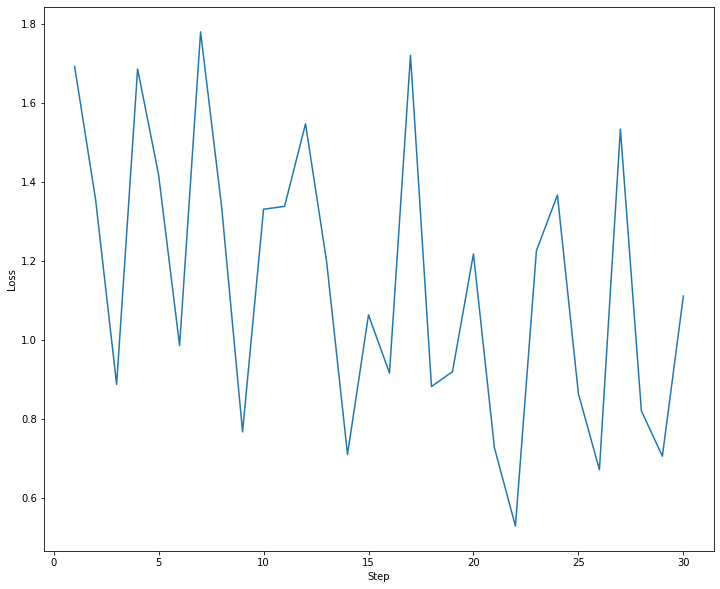

In [ ]:
x = (range(1, 31))

plt.figure(figsize = (12, 10))

plt.plot(x, loss_values)
plt.xlabel('Step')
plt.ylabel('Loss')

In [ ]:
model.eval()  

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the 10000 test images: {}%'\
          .format(100 * correct / total))


Accuracy of the model on the 10000 test images: 70.47%


In [ ]:
# prediction on sample image
sample_img, _ = testset[23]

In [ ]:
sample_img.shape

torch.Size([3, 32, 32])

In [ ]:
sample_img = np.transpose(sample_img, (1, 2, 0))

In [ ]:
m, M = sample_img.min(), sample_img.max()

sample_img = (1/(abs(m) * M)) * sample_img + 0.5 

In [ ]:
sample_img

tensor([[[0.3205, 0.3665, 0.4492],
         [0.3166, 0.3154, 0.3687],
         [0.3244, 0.3390, 0.3980],
         ...,
         [0.3050, 0.3154, 0.3724],
         [0.4445, 0.4687, 0.5151],
         [0.5298, 0.5631, 0.6140]],

        [[0.3244, 0.3508, 0.4126],
         [0.3283, 0.3232, 0.3614],
         [0.3128, 0.3311, 0.3834],
         ...,
         [0.6849, 0.6890, 0.6762],
         [0.8167, 0.8266, 0.8007],
         [0.8283, 0.8423, 0.8190]],

        [[0.3360, 0.3508, 0.3834],
         [0.3515, 0.3429, 0.3651],
         [0.2856, 0.3075, 0.3541],
         ...,
         [0.8128, 0.8187, 0.7641],
         [0.7353, 0.7362, 0.6872],
         [0.6926, 0.6968, 0.6433]],

        ...,

        [[0.6577, 0.6693, 0.6469],
         [0.6577, 0.6732, 0.6469],
         [0.6500, 0.6654, 0.6359],
         ...,
         [0.6345, 0.6339, 0.6103],
         [0.6267, 0.6260, 0.6066],
         [0.6035, 0.6024, 0.5810]],

        [[0.6151, 0.6260, 0.6176],
         [0.6539, 0.6654, 0.6506],
         [0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


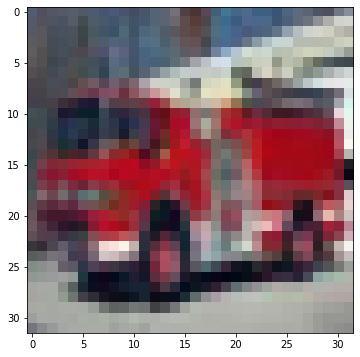

In [ ]:
plt.figure(figsize = (6, 6))
plt.imshow(sample_img)

In [ ]:
test_img, test_label = testset[23]

test_img = test_img.reshape(-1, 3, 32, 32)

In [ ]:
out_predict = model(test_img.to(device))
_,predicted = torch.max(out_predict.data, 1)

In [ ]:
print("Actual Label : ", test_label)

Actual Label :  9


In [ ]:
print("Predicted Label : " ,predicted.item())

Predicted Label :  9


In [ ]:
print("Class name for {} : {}".format( predicted.item(), class_names[predicted.item()]))

Class name for 9 : truck


#transfer learning

In [ ]:
import copy
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets,transforms 

In [ ]:
'''# the practive of reusing a trained neural network that solves a problem similar 
# to ours, freezing the lower layers and only retraining the higher layers

# reusing involves: reusing the architecture of the model as well as pre-trained weights

# lower layers extract granular details or features from the data, this can be freezed
# and higher layers hav to be retrained to fit on our use case as they are extract more specific features

# benefits of tranfer learning
# things which are laid out
nn architecture
choice of initialization
activation func
no and density of layers

# all these are tweeked to work well 
# it helps us to do more even with less data
# overfiting can be avoided
# training is faster n cheaper

pytorch supports several nn architectures
AlexNeet
VGG
ResNet
Inception'''

In [ ]:
# pre trained models expect img size to be at lease 224 x 224 pixels
# pixel values shld be in range 0 to 1
# shld be normalized values

In [ ]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224), #resizing img from 32x32 to 224x224 by random resize crop
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean = mean, std = std)
])

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [ ]:
data_dir = 'datasets/cifar10/train'
batch_size = 8
num_workers = 2

In [ ]:
trainset = datasets.CIFAR10(root=data_dir,
                            train=True,
                            download=True,
                            transform=train_transform)

Files already downloaded and verified


In [ ]:
testset = datasets.CIFAR10(root=data_dir,
                           train=False,
                           download=True,
                           transform=test_transform)

Files already downloaded and verified


In [ ]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=num_workers)

In [ ]:
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=batch_size,
                                         shuffle=False,
                                         num_workers=num_workers)

In [ ]:
# single dict with train and test data loaders
dataloaders = {
    'train': trainloader,
    'test': testloader
}

In [ ]:
# explore dataset
# no of batches in train n test 

dataset_sizes = { 'train': len(trainloader), 'test': len(testloader) }

In [ ]:
dataset_sizes
# with batchsize of 8 we have these many batches in train n test

{'test': 1250, 'train': 6250}

In [ ]:
class_names = trainset.classes

print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
'''Transfer learning
Load the pretrained model, Resnet18
Define parameters
The criterion to minimize in the loss function. Given this is a classification model, we will look to minimize the cross-entropy loss
A simple SGD optimizer with momentum which accelerate gradients vectors in the right directions and hence leads to faster converging
Scheduler to decay Learning Rate by a factor of 0.1 every 7 epochs'''

'Transfer learning\nLoad the pretrained model, Resnet18\nDefine parameters\nThe criterion to minimize in the loss function. Given this is a classification model, we will look to minimize the cross-entropy loss\nA simple SGD optimizer with momentum which accelerate gradients vectors in the right directions and hence leads to faster converging\nScheduler to decay Learning Rate by a factor of 0.1 every 7 epochs'

In [ ]:
# all pre trained models in pytorch are in models
from torchvision import models

In [ ]:
# using Resnet18 img classification model
model = models.resnet18(pretrained=True)
# to use pretrained weights , set pretrained to True
# to just use architecure of the model, set it to False

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# in order for us to use this model we need to change the last linear layer
# of the model, output is 1000 classes, so for cifar we have 10 classes 

# there is a key associated with each layer of the model,
# for last layer its fc



In [ ]:
# 1st thing to do is to freeze the model parameters of all the layers in this pretrained model
# no need to train those parameters,
# we only require to set the requires_grad = False
# for every param, to freeze model parameters
for param in model.parameters():
    param.requires_grad = False

In [ ]:
# in_features are the no of features we need to pass into the input of this layer
num_ftrs = model.fc.in_features
num_ftrs

512

In [ ]:
# instantiate a new linear layer as the last layer of the ResNet model 
# the input of this layer is = num_features and output is = no of output labels in our img dataset

model.fc = nn.Linear(num_ftrs, 10)

# we only train the model weights of the last linear layer

In [ ]:
device = torch.device("cpu")

if torch.cuda.is_available():
    device = torch.device("cuda")
# use cpu if cpu is only available otherwise use gpu

In [ ]:
print(device)

cuda


In [ ]:
# copyover our model parameters to the cuda device
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# last linear layer is as we specified

In [ ]:
'''Define training and test phase
scheduler.step() will set up the scheduler for each step in order to decay the learning rate
Each epoch has a training and test phase
model.train() will set the pre-trained model into training mode. This is only available for pre-trained models
running_loss will keep track of the loss at each iteration
running_corrects keeps a count of the number of correct predictions which will be used to calculate the accuracy of the model
outputs is the list probabilities for each possible label for the batch of images (which are the inputs). We use torch.max() to get the index of the highest probability label for each image in the batch '''

'Define training and test phase\nscheduler.step() will set up the scheduler for each step in order to decay the learning rate\nEach epoch has a training and test phase\nmodel.train() will set the pre-trained model into training mode. This is only available for pre-trained models\nrunning_loss will keep track of the loss at each iteration\nrunning_corrects keeps a count of the number of correct predictions which will be used to calculate the accuracy of the model\noutputs is the list probabilities for each possible label for the batch of images (which are the inputs). We use torch.max() to get the index of the highest probability label for each image in the batch '

In [ ]:
criterion        = nn.CrossEntropyLoss()

optimizer_ft     = optim.SGD( model.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR( optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    
    best_acc = 0.0
    best_model_wts = copy.deepcopy(model.state_dict())
    

    for epoch in range(num_epochs):
        
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        step = 0
        
        for phase in ['train', 'test']:
            
            if phase == 'train':
                scheduler.step()
                model.train(True)  
                # Set model to training mode
                
            else:
                model.train(False)  
                # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0


            for inputs, labels in dataloaders[phase]:

                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()

                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)
                
                step += 1
                if step % 500 == 0:
                    print('Epoch: {} Loss: {:.4f},  Step: {}'.format(epoch, loss.item(), step))
                
                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double()/ (dataset_sizes[phase]*batch_size)

            print('{} Loss: {:.4f} Acc: {:.4f} '.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()
    
    print('Training complete')
    print('Best test Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    
    return model

In [ ]:
model = train_model(model, criterion, optimizer_ft,
                         exp_lr_scheduler, num_epochs=1)

Epoch 0/0
----------


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Epoch: 0 Loss: 1.4262,  Step: 500
Epoch: 0 Loss: 1.2678,  Step: 1000
Epoch: 0 Loss: 1.2525,  Step: 1500
Epoch: 0 Loss: 1.7911,  Step: 2000
Epoch: 0 Loss: 1.0872,  Step: 2500
Epoch: 0 Loss: 2.4249,  Step: 3000
Epoch: 0 Loss: 1.4779,  Step: 3500
Epoch: 0 Loss: 1.7272,  Step: 4000
Epoch: 0 Loss: 0.9058,  Step: 4500
Epoch: 0 Loss: 2.2071,  Step: 5000
Epoch: 0 Loss: 2.2601,  Step: 5500
Epoch: 0 Loss: 0.8767,  Step: 6000
train Loss: 11.7198 Acc: 0.4929 
Epoch: 0 Loss: 0.8793,  Step: 6500
Epoch: 0 Loss: 0.7194,  Step: 7000
Epoch: 0 Loss: 0.5569,  Step: 7500
test Loss: 6.4884 Acc: 0.7224 

Training complete
Best test Acc: 0.722400


In [ ]:
# predictionss
def imshow(inp, title):

    inp = inp.cpu().numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    
    plt.imshow(inp)
    plt.title(title)
    plt.pause(5)  

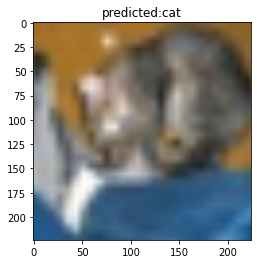

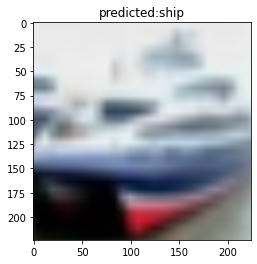

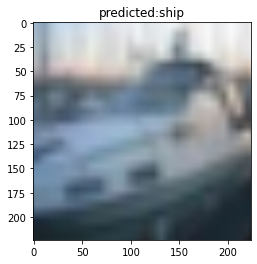

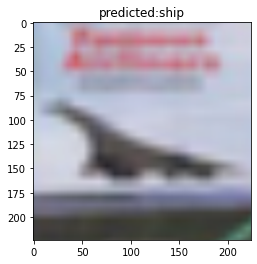

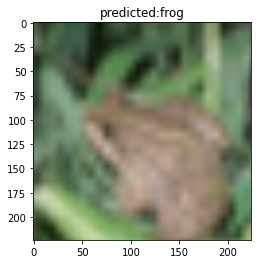

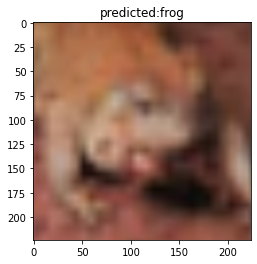

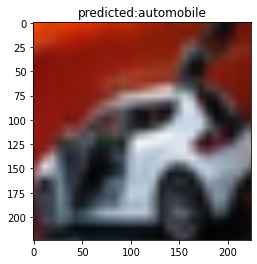

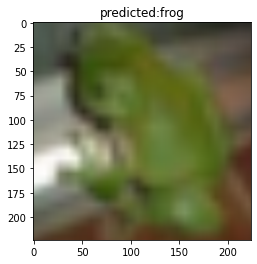

In [ ]:
with torch.no_grad():
    
    inputs, labels = iter(dataloaders['test']).next()
    inputs, labels = inputs.to(device), labels.to(device)
    inp = torchvision.utils.make_grid(inputs)
    
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    
    for j in range(len(inputs)):
        inp = inputs.data[j]
        imshow(inp, 'predicted:' + class_names[preds[j]])

In [ ]:
# clean up deep learning vm instance

In [ ]:
# other courses: building features from image data
# mining data from images

